# Import section

In [74]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

np.random.seed(2020)
random.seed(2020)

# Preprocess data

Read data and convert targets to integers 1 and 0.

In [75]:
PATH = 'data/'
df = pd.read_csv(PATH+'sonar-all-data.csv', header=None)
df.columns = [f'feat_{col}' if col!=60 else 'target' for col in df.columns]
df['target'] = df['target'].map({'M': 1, 'R': 0})
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


# Homework part 1. RandomForestClassifier

_Note_ : Consider **accuracy** as main metric of model performance on this dataset.

In [76]:
from sklearn.ensemble import RandomForestClassifier

**Task 1 (0.5 points)** Split the dataset into train, test and validation parts (0.6 / 0.2 / 0.2). First two will be used for model hyperparameter tuning whereas the best model quality should be evaluated on validation part.

In [77]:
# Your code here
X_tt, X_val, y_tt, y_val = train_test_split(df.drop(columns='target'), df['target'], test_size=0.2, random_state=2020)
X_train, X_test, y_train, y_test = train_test_split(X_tt, y_tt, test_size=0.2, random_state=2020)
print(y_tt.shape, y_val.shape)
print(y_train.shape, y_test.shape)

(166,) (42,)
(132,) (34,)


**Task 2 (2 points)**. Apply '_greedy_' hyperparameter tuning of RandomForestClassifier model. '_Greedy_' way means the following general approach. At first we tune one model parameter whereas others are fixed with default values. Then we move on to tune the second parameter whereas others are fixed default values and first has the best values from previous step. After it we tune the third parameter with best fixed values for previous two and default values for the rest. Repeat until we go through all the parameters, then repeat this cycle if you are seeing a clear increase in the test metric. <br>

Although this approach has a lot of disadvantages (you may think which ones), sometimes that is the only way to tune model typerparams due to big training time **if you understand how the model parameters are interrelated and the tuning order takes those dependencies into account.**<br>

Here is one of the possible options for RandomForestClassifier:
- Choose a decent value for number of trees using '_elbow_' rule. You may plot the dependence of accuracy on trees_num and pick up the number after which the error decreases not **as much as before**. 
- Pick up the best split criterion ('gini' / 'entropy') and then tune _max_depth_, _min_samples_split_, _min_samples_leaf_.
- Increase number of trees with best found parameters so far.
- Repeat this excersice starting from picking the best split criterion while other params are fixed with best values from previous steps **if you observe a significant test metric improvement**. Otherwise just stop and measure your best model result on validation set.

Text(0, 0.5, 'Accuracy')

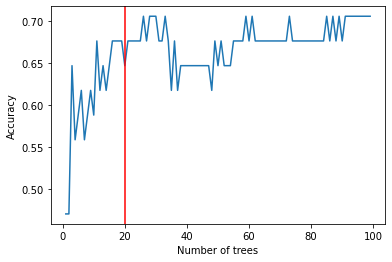

In [78]:
# построение графика правила локтя
from sklearn.metrics import mean_squared_error

trees_num = range(1,100)
accuracy = []
for i in trees_num:
    rf_ = RandomForestClassifier(n_estimators=i, random_state=100)
    rf_.fit(X_train, y_train)
    y_hat = rf_.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_hat))
    #print(f"Accuracy score is: {accuracy_score(y_test, y_hat)}")

plt.plot(trees_num, accuracy)
plt.axvline(x=20, color='Red')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')

This plot shows that the accuracy stops increasing after the number of trees ~20

In [79]:
n_est = 20

In [80]:
criterions = ['gini', 'entropy']
for x in criterions:
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=None, criterion=x, random_state=42)
    rf.fit(X_train, y_train)
    y_hat = rf.predict(X_test)
    print(f"Accuracy score with {x} is: {accuracy_score(y_test, y_hat)}")
criterion = 'entropy'

Accuracy score with gini is: 0.6176470588235294
Accuracy score with entropy is: 0.6764705882352942


In [81]:
max_depths = range(2,15)
accuracy = np.zeros(15)
for d in max_depths:
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=d, criterion=criterion, random_state=42)
    rf.fit(X_train, y_train)
    y_hat = rf.predict(X_test)
    accuracy[d] = accuracy_score(y_test, y_hat)
    #accuracy.append(accuracy_score(y_test, y_hat))

print(f'The highest acccuracy score is {np.max(accuracy)} with max_depth = {np.argmax(accuracy)}')
max_depth = np.argmax(accuracy)
#accuracy

The highest acccuracy score is 0.7058823529411765 with max_depth = 4


In [82]:
min_samples_splits = range(2,30)
accuracy = np.zeros(30)
for s in min_samples_splits:
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_depth, criterion=criterion, min_samples_split = s,
                                random_state=42)
    rf.fit(X_train, y_train)
    y_hat = rf.predict(X_test)
    accuracy[s] = accuracy_score(y_test, y_hat)

print(f'The highest acccuracy score is {np.max(accuracy)} with min_samples_split = {np.argmax(accuracy)}')
min_samples_split = np.argmax(accuracy)
#accuracy

The highest acccuracy score is 0.7647058823529411 with min_samples_split = 8


In [83]:
min_samples_leafs = range(1,30)
accuracy = np.zeros(30)
for l in min_samples_leafs:
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_depth, criterion=criterion, 
                                min_samples_split = min_samples_split, min_samples_leaf = l, random_state=42)
    rf.fit(X_train, y_train)
    y_hat = rf.predict(X_test)
    accuracy[l] = accuracy_score(y_test, y_hat)


print(f'The highest acccuracy score is {np.max(accuracy)} with min_samples_leaf = {np.argmax(accuracy)}')
min_samples_leaf = np.argmax(accuracy)
#accuracy

The highest acccuracy score is 0.7647058823529411 with min_samples_leaf = 1


Text(0, 0.5, 'Accuracy')

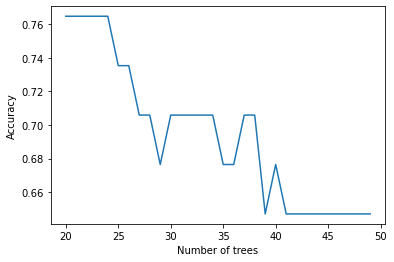

In [84]:
n_estimators = range(20,50)
accuracy = np.zeros(50)
for e in n_estimators:
    rf = RandomForestClassifier(n_estimators=e, max_depth=max_depth, criterion=criterion, 
                                min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf,
                                random_state=42)
    rf.fit(X_train, y_train)
    y_hat = rf.predict(X_test)
    accuracy[e] = accuracy_score(y_test, y_hat)

#accuracy
plt.plot(n_estimators, accuracy[20:50])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')

This plot shows that a further increase in the number of trees does not lead to an increase in the accuracy, so let's stop on this step.

In [85]:
rf_greedy = RandomForestClassifier(n_estimators = 20, criterion='entropy', max_depth=4, 
                                      min_samples_leaf=1, min_samples_split=8, random_state=42)
print('Accuracy for train data: ', cross_val_score(rf_greedy, X_train, y_train, scoring='accuracy', cv=5).mean())

Accuracy for train data:  0.7954415954415955


Applying 'greedy' hyperparameter tuning gave us the following model: RandomForestClassifier(n_estimators = 20, max_depth = 4, criterion = 'entropy', min_samples_split = 8, min_samples_leaf = 1). Accuracy on test data is 0.7647


### Grid Search and Random Search

**Task 3 (1 point)**. Compare your previous results with [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) hyperparameter tuning. You may tune best hyperparameters for forest with several trees and then increase it while measure the quality on validation dataset.

In [86]:
from sklearn.model_selection import GridSearchCV 

In [87]:
rf_clf = RandomForestClassifier()
param_grid = {'n_estimators' : range(15,25), 
              'criterion' : ['gini', 'entropy'],
              'max_depth' : range(2,10),
              'min_samples_split' : range(2,100),
              'min_samples_leaf' : range(1,5)}
#rf_clf_gsCV = GridSearchCV(rf_clf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_rf_clf_gsCV = rf_clf_gsCV.fit(X_train,y_train)

#print('RF best score: ', best_rf_clf_gsCV.best_score_)
#print('RF best parameters: ', best_rf_clf_gsCV.best_params_)

#best_rf = best_rf_clf.best_estimator_

This task requires computational costs, so I just will use the result:

In [88]:
best_rf_gsCV = RandomForestClassifier(n_estimators = 19, criterion='gini', max_depth=9, 
                                      min_samples_leaf=2, min_samples_split=4, random_state=42)
print('Accuracy for TRAIN data: ', cross_val_score(best_rf_gsCV, X_train, y_train, scoring='accuracy', cv=5).mean())
best_rf_gsCV.fit(X_train, y_train)
y_hat = best_rf_gsCV.predict(X_test)
print(f"Accuracy for TEST data: {accuracy_score(y_test, y_hat)}")

Accuracy for TRAIN data:  0.8396011396011396
Accuracy for TEST data: 0.6470588235294118


Model selected by the GridSearchCV has higher accuracy on the train dataset, but on the test one.

**Task 4 (1 point)**. And finally tune forest hyperparameters with [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Compare results to previous attempts.

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
param_grid = {'n_estimators' : range(15,30), 
              'criterion' : ['gini', 'entropy'],
              'max_depth' : range(2,10),
              'min_samples_split' : range(2,20),
              'min_samples_leaf' : range(1,5)}
#rf_clf_rsCV = RandomizedSearchCV(rf_clf, param_grid, cv = 5, random_state=42, n_jobs = -1)
#best_rf_clf_rsCV = rf_clf_rsCV.fit(X_train,y_train)

#print('RF best score: ', best_rf_clf_rsCV.best_score_)
#print('RF best parameters: ', best_rf_clf_rsCV.best_params_)


In [91]:
best_rf_rsCV  = RandomForestClassifier(n_estimators = 28, criterion='entropy', max_depth=6, 
                                      min_samples_leaf=1, min_samples_split=12, random_state=42)
print('Accuracy for TRAIN data: ', cross_val_score(best_rf_gsCV, X_train, y_train, scoring='accuracy', cv=5).mean())
best_rf_rsCV.fit(X_train, y_train) 
y_hat = best_rf_rsCV.predict(X_test)
print(f"Accuracy for TEST data: {accuracy_score(y_test, y_hat)}")

Accuracy for TRAIN data:  0.8396011396011396
Accuracy for TEST data: 0.6764705882352942


Same results as with GridSearchCV.

**Task 5 (0.5 points)**. Tell us about your experience in hyperparameter tuning with the approaches above. What do you think would be the best option for this task and why?

For a RandomForest, as it seems to me, the first approach ('greedy' tuning) is quite applicable. We start from the most important parameters to those that affect the model the least. Yes, the resulting model is probably not gobal optimal, but neither GridSearchCV nor RandomSearchCV give us any guarantees of finding the global minimum. Accuracies of the obtained models indicate, apparently, overfifitting of the models.